# **Project Name** - Yes bank closing price prediction  




##### **Project Type**    - Regression(Supervised Learning)
##### **Contribution**    - Individual


# **Project Summary -**

This undertaking involves assessing the repercussions of a fraud incident involving Rana Kapoor on Yes Bank's stock prices. The dataset utilized encompasses monthly stock prices of Yes Bank since its inception, encompassing details like closing, opening, highest, and lowest stock prices.

In an effort to forecast the stock's closing price, I devised three models: Linear Regression, Random Forest, and XGBoost Regressor. These models underwent training using historical stock price data, incorporating diverse features such as the mean of Open, High, and Low attributes. Model performance was assessed using metrics such as RMSE (Root Mean Squared Error), adjusted R^2, and R^2 score. Notably, XGBoost exhibited superior performance among the three, attaining a commendable R^2 score and adjusted R^2, coupled with low RMSE and MAE errors.

The XGBoost model's feature importance analysis proved instrumental in pinpointing the pivotal factors influencing the stock price.

In summary, the project's objective was to enhance comprehension of the interplay between the fraud case and Yes Bank's stock prices. With completion, the project is now poised to make predictions on unseen data.

# **GitHub Link -**

https://github.com/piyaSaxena04/YES_BANK_CLOSING_PRICE_PREDICTION

# **Problem Statement**


 Yes bank is a well_know bank in indian financial domain.Since2018, it has been in the news because of the fraud case involving Rana kapoor.owingto this fact, it was intresting to see how that impacted the stock price of the company and whether time series models or any other predictive models can do justice to such situation. This dataset has monthly stock prices of the bank since its insepction and include closing, starting,highest and lowest price of every month. The main objective is to predict the stock's closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import (Ridge,RidgeCV)



### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


dataset = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:

dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

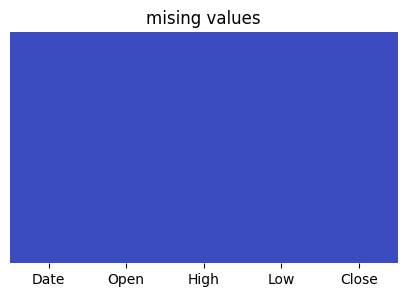

In [ ]:
# Visualizing the missing values
missing_values = dataset.isnull()
plt.figure(figsize = (5,3))
sns.heatmap(missing_values,cmap='coolwarm',cbar=False,yticklabels=False)
plt.title('mising values')
plt.show()



### What did you know about your dataset?


in this dataset we have 5 columns and 185 rows. Among the 5 columns 4 are independent variable and one dependent variable.There are no duplicate values,null values or missing values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description


Date Date of the record. It has monthly dates from july 2005 to November 2020.data type is object and we need to change into datetime

open-opening price of the share/stock(Numerical)

High-Highest price of the share for that day(Numerical)

Low-Lowest price of the sharefor that day(Numerical)

Close-Closing price of the share for that day(Numerical)


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No.of unique values in ",i,"is",dataset[i].nunique())

No.of unique values in  Date is 185
No.of unique values in  Open is 183
No.of unique values in  High is 184
No.of unique values in  Low is 183
No.of unique values in  Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
data_set = dataset.copy()
data_set.head()
data_set.shape
data_set['Date'] = pd.to_datetime(data_set['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))
data_set.set_index('Date',inplace=True)
data_set.head()



,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

i have changed datatype of Date variable to determine.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

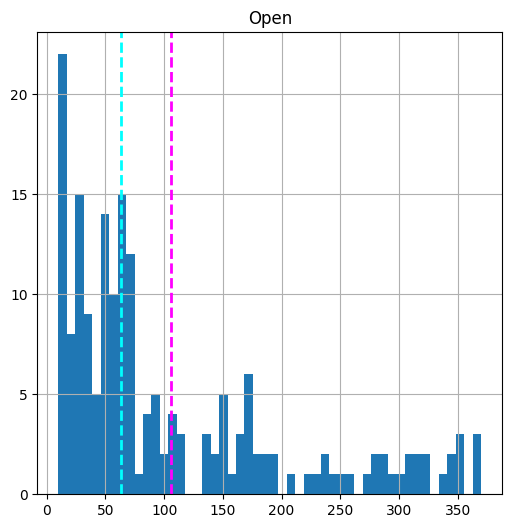

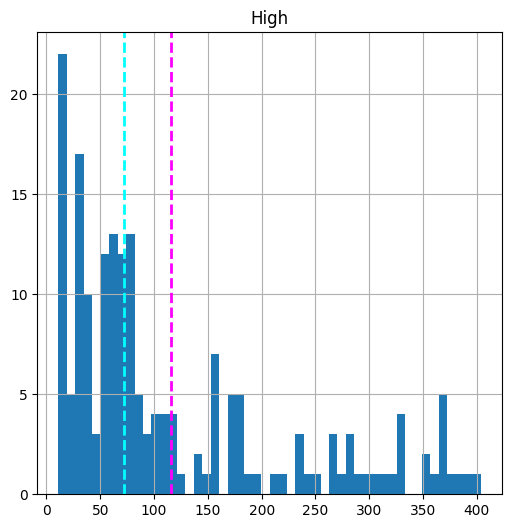

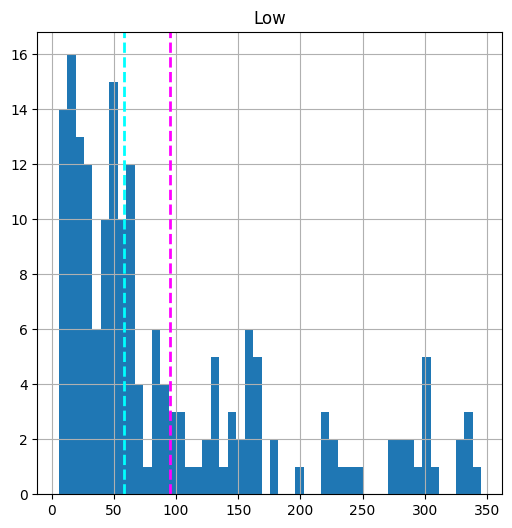

In [ ]:
numeric_features = data_set.columns
numeric_features

# Chart - 1 visualization code
for col in numeric_features[:-1]:
  fig = plt.figure(figsize=(6,6))
  ax = fig.gca()
  features = data_set[col]
  features.hist(bins=50, ax = ax)
  ax.axvline(features.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(features.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)

plt.show()


##### 1. Why did you pick the specific chart?

 I choose this chart it is a histogram with vertical lines indicating the mean and median for each numeric feature in the dataset.
This type of chart is commonly used for exploring the distribution of numerical variables.

##### 2. What is/are the insight(s) found from the chart?

 The vertical dashed lines for mean (magenta) and median (cyan) help assess the central tendency of each feature. If the lines are close together, it suggests a symmetric distribution; if they are apart, it indicates skewness.
The position of the mean and median lines relative to the histogram peaks and tails gives an indication of skewness. For instance, if the mean is to the right of the median, the distribution may be right-skewed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Positive Business Impact:

Identifying Opportunities: Understanding the distribution of key features can help identify opportunities for business growth. For example, if a certain product or service has a positively skewed distribution, it may suggest potential for increased sales.

Optimizing Processes: Identifying outliers can highlight areas where processes may be improved. For instance, extreme values in processing times or costs may signal inefficiencies that, when addressed, could lead to cost savings or increased efficiency.

Customer Insights: Analyzing the distribution of customer-related features may reveal patterns that help tailor marketing strategies. For instance, understanding the income distribution of customers can inform pricing and marketing strategies.

Risk Management: Detecting outliers and understanding the variability in certain metrics can aid in risk management. It allows businesses to proactively address potential issues before they escalate.
Insight negtive
Skewed Distributions: If the distribution of a key metric is heavily skewed, it may indicate a concentration of values in one direction. For example, if a product sales distribution is highly skewed to the lower end, it might suggest that only a few products are driving sales, posing a risk if those products decline.

Outliers Impacting Averages: Outliers in certain metrics can significantly impact mean values. Relying solely on means without considering the distribution may lead to misleading conclusions. Understanding the distribution helps to better interpret the significance of outliers.

Data Quality Issues: If there are unexpected patterns or outliers, it may indicate data quality issues. Inaccurate or incomplete data can lead to incorrect business decisions.

Competitive Analysis: Comparing the distributions of relevant metrics with competitors may reveal areas where your business is underperforming. While this is an opportunity for improvement, it could be seen as a negative if not addressed.

In summary, the insights gained from visualizations can be a valuable tool for strategic decision-making. However, it's crucial to interpret the findings in the broader business context and consider the potential implications for positive growth or areas requiring attention and improvement. Additionally, ensuring data accuracy and understanding the limitations of the analysis are essential for making informed decisions.

#### Chart - 2

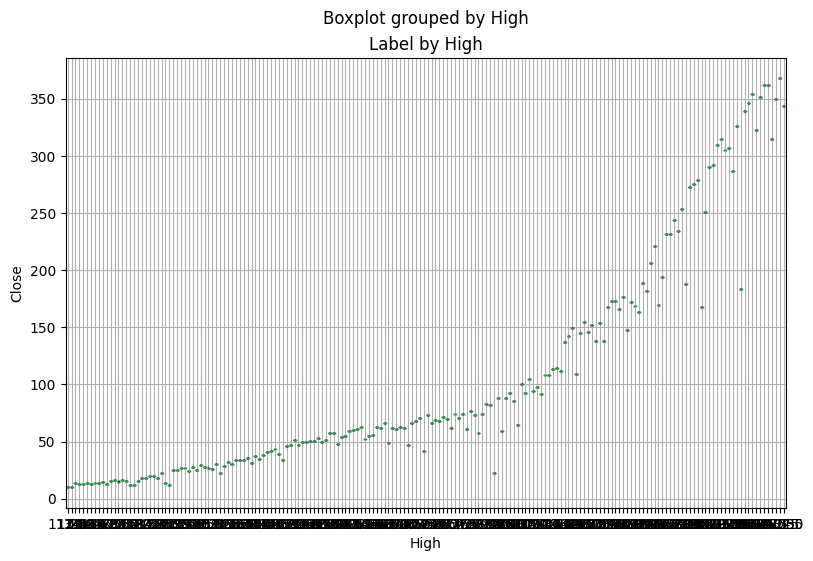

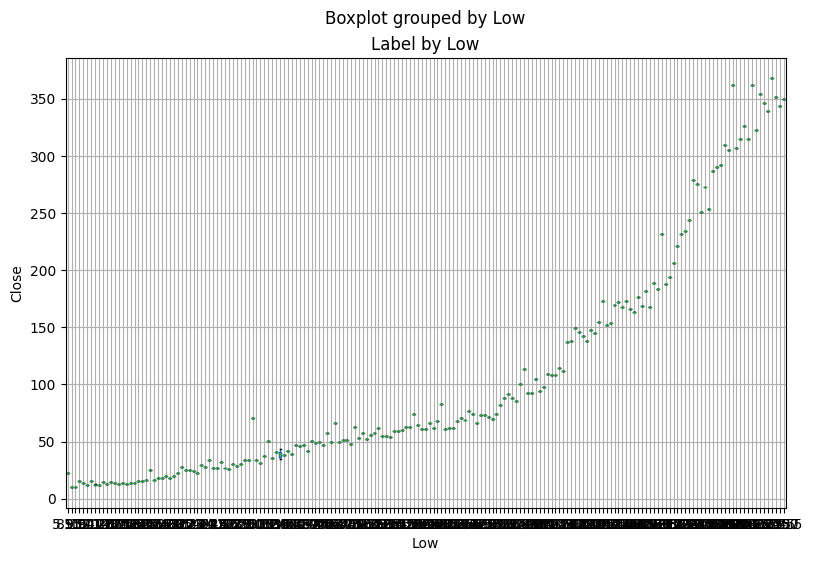

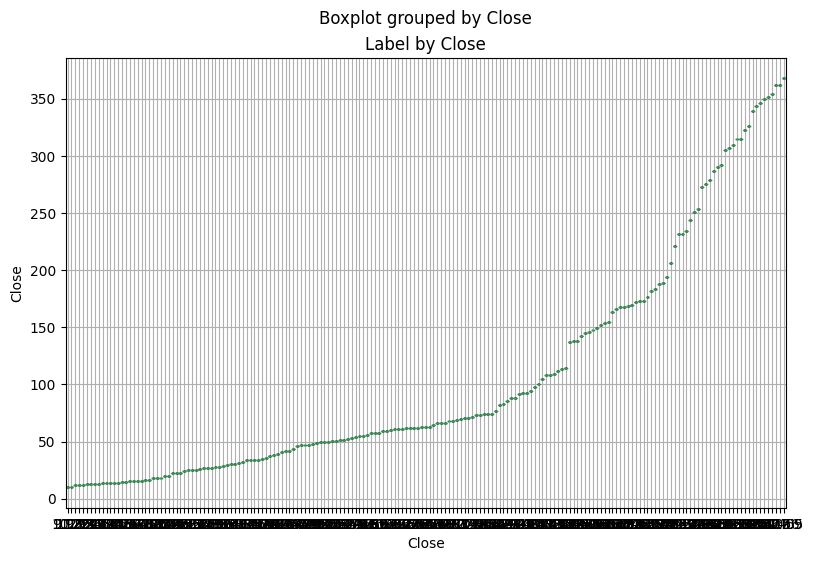

In [ ]:
# Chart - 2 visualization code
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    data_set.boxplot(column = 'Close', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Close")
plt.show()

##### 1. Why did you pick the specific chart?

a box plot (boxplot) to visualize the distribution of the 'Close' variable across different categories defined by each numeric feature. Here are reasons for choosing a box plot in this context:
Comparison of Distributions:

Outlier Detection:


Understanding Variation:


Category Comparison:


Visualizing Quartiles:


Facilitates Multivariate Analysis:

##### 2. What is/are the insight(s) found from the chart?

The insights would be specific to the distribution of the 'Close' variable across different categories defined by each numeric feature:

Central Tendency

Variability

Outlier Detection

Comparison Across Categories


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Identification of Strong Performers:

If certain categories within numeric features consistently exhibit higher median 'Close' values or less variability, it may suggest areas of strength or success. Understanding what contributes to these positive outcomes can inform strategies for further growth.
Opportunity Recognition:

Observing categories with lower variability and higher median 'Close' values may highlight areas where the business is performing well. This insight can be used to identify opportunities for expansion, marketing, or optimization of resources.
Customer Segmentation Insights:

If the box plots reveal distinct patterns across different segments defined by numeric features, it may provide insights into customer behavior and preferences. This knowledge can guide targeted marketing efforts and product/service customization.

Considerations for Potential Negative Growth:

Outlier Identification:

If certain categories consistently show outliers in 'Close' values, it may indicate specific issues or challenges within those segments. Outliers could represent extreme cases of negative performance that need investigation.
High Variability:

Categories with high variability in 'Close' values may indicate uncertainty or inconsistency in customer behavior. While variability is natural, excessively high variability may suggest a lack of predictability, which could impact business planning and forecasting.

#### Chart - 3

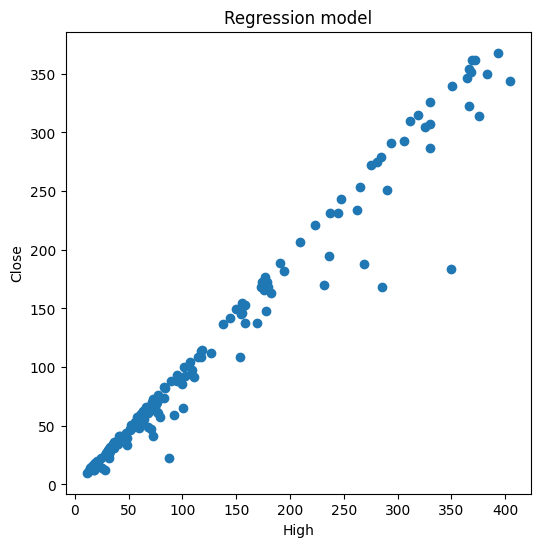

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(6,6))
plt.scatter(data_set['High'],data_set['Close'])
plt.xlabel('High')
plt.ylabel('Close')
plt.title('Regression model')
plt.show()

##### 1. Why did you pick the specific chart?

 The scatter plot was chosen for several reasons:

Visualizing Relationships: A scatter plot is effective for visualizing relationships between two continuous variables. In this case, it helps in understanding how the 'High' values relate to the 'Close' values.

Identifying Patterns: Scatter plots are useful for identifying patterns or trends in the data. By examining the distribution of points, you can gain insights into the general behavior of the two variables.

Outlier Detection: Outliers, if present, can be easily identified in a scatter plot. Unusual data points that deviate from the general pattern are visually apparent.

Intuitiveness: Scatter plots are straightforward and intuitive. They provide a clear visual representation of the data points and their distribution.

Quantitative Analysis Possibility: While not explicitly done in the initial code, scatter plots can be extended to include regression lines or other quantitative analysis techniques to further understand the relationship between variables.

Variable Identification: The axes of the scatter plot are clearly labeled, making it easy to identify which variable is represented on each axis ('High' on the x-axis and 'Close' on the y-axis).

Insights for Regression Modeling: Scatter plots are often used as a preliminary step before fitting a regression model. They allow you to assess the suitability of a linear relationship between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here
Direction of Relationship:
Strength of Relationship:
Outlier Identification:
Pattern Recognition:
Potential for Regression Modeling:
Business Implications:

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Positive Business Impact:

Identifying Opportunities:

If a strong positive correlation is observed between 'High' and 'Close,' it suggests that as the 'High' values increase, the 'Close' values tend to increase as well. This insight can be valuable for timing investment decisions or trading strategies.
Optimizing Strategies:

Understanding the relationship between 'High' and 'Close' allows businesses to optimize strategies related to pricing, sales, or investments. For example, it may help in setting more informed pricing strategies based on the observed patterns.
Risk Management:

Recognition of outlier patterns can aid in risk management. Outliers may represent unusual market conditions or events, and understanding them can be crucial for mitigating risks and making informed decisions.

Considerations for Potential Challenges or Negative Growth:

Weak or No Correlation:

If the scatter plot shows a weak or no correlation between 'High' and 'Close,' it might limit the effectiveness of using 'High' values as predictors for 'Close.' In such cases, business decisions relying on this relationship may be less reliable.
Misleading Relationships:

Correlation does not imply causation. Even if a strong correlation is observed, it's important to critically assess whether there is a causal relationship or if other factors may be influencing both 'High' and 'Close' independently.
Unidentified External Factors:

The scatter plot may not capture all relevant external factors influencing 'Close' values. Failure to account for external factors can lead to incomplete insights and potentially incorrect business decisions.
Overreliance on Historical Patterns:

Market conditions and business environments change over time. Relying too heavily on historical patterns observed in the scatter plot without considering dynamic factors may lead to suboptimal decision-making.


#### Chart - 4

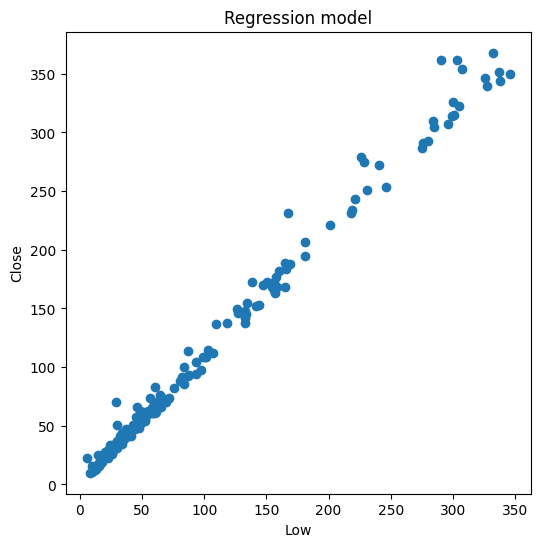

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(6,6))
plt.scatter(data_set['Low'],data_set['Close'])
plt.xlabel('Low')
plt.ylabel('Close')
plt.title('Regression model')
plt.show()

##### 1. Why did you pick the specific chart?



i want to check the data distribution of independent variabe (Low)and dependent variable(close)

##### 2. What is/are the insight(s) found from the chart?



it seems that there are some outliers here,but as compared to the open nd high values,we have fewer outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Yes,this insight can help us when building a model.

#### Chart - 5

<Axes: xlabel='Close', ylabel='Density'>

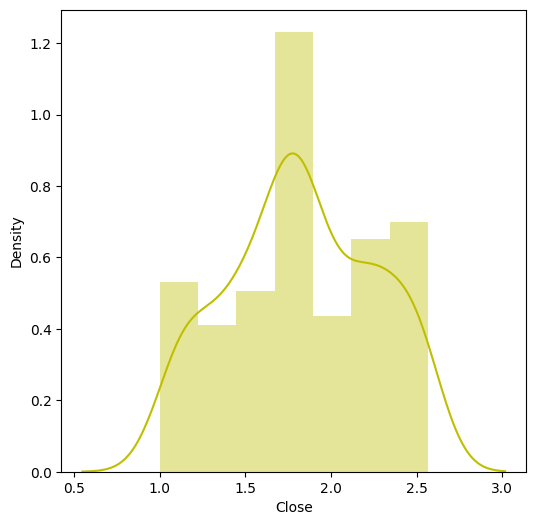

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(6,6))
sns.distplot(np.log10(data_set['Close']), color='y')

##### 1. Why did you pick the specific chart?



i have seen some skewness in chart 1 that's why i want to check will np.log10 trasforms the skewness to normally distributed.


##### 2. What is/are the insight(s) found from the chart?



After applying np.log10 to the data. It seems that the data has become somewhat closer to normal.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Yes,because skewness can put in negative effect on a model.

#### Chart - 6

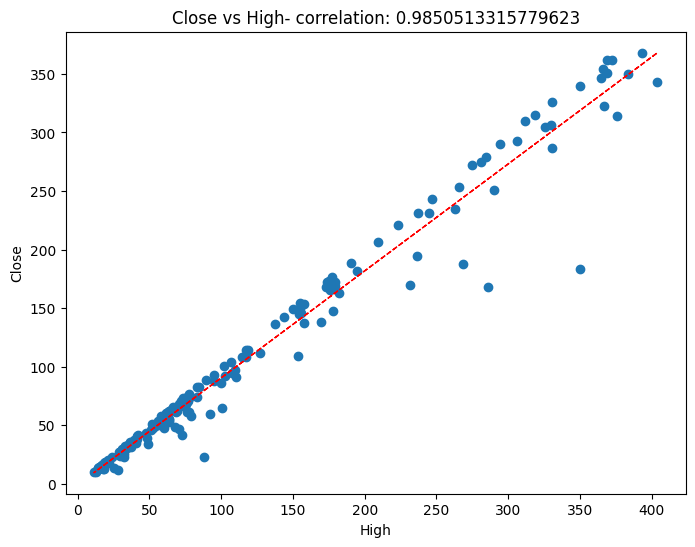

In [ ]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
feature = data_set['High']
label = data_set['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'High' + '- correlation: ' + str(correlation))
z = np.polyfit(data_set['High'], data_set['Close'], 1)
y_hat = np.poly1d(z)(data_set['High'])


plt.plot(data_set['High'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?



I want to check correlation between independent variable (Open)and dependent variable(Close).

##### 2. What is/are the insight(s) found from the chart?



It seems that independent variable (Open)is highly correlated with dependent variable(Close)and there are some outliers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



If independent variable is highly correlated with dependent variable. it can lead to overfitting.

#### Chart - 7

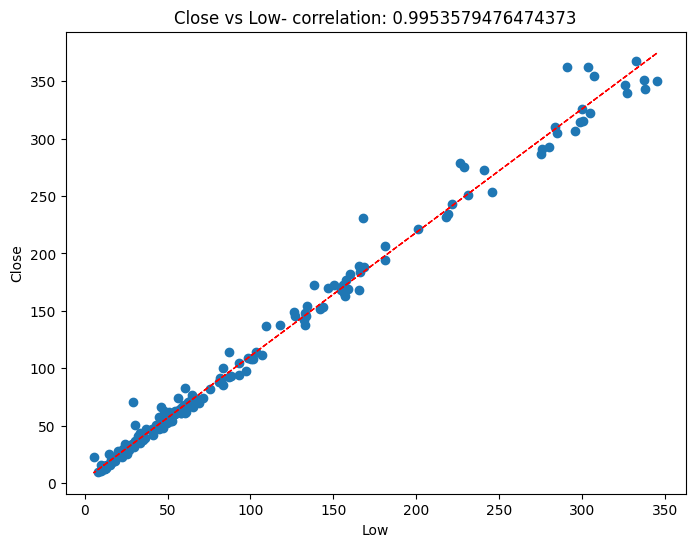

In [ ]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
feature = data_set['Low']
label = data_set['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Low' + '- correlation: ' + str(correlation))
z = np.polyfit(data_set['Low'], data_set['Close'], 1)
y_hat = np.poly1d(z)(data_set['Low'])


plt.plot(data_set['Low'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I want to check correlation between independent variable (Low)and dependent variable (Close).

##### 2. What is/are the insight(s) found from the chart?

Answer Here

It seems that independent variable (Low)is highly correlated with dependent variable(Close).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

If independent variable is highly correlated with dependent variable.it can lead to overfitting

#### Chart - 8

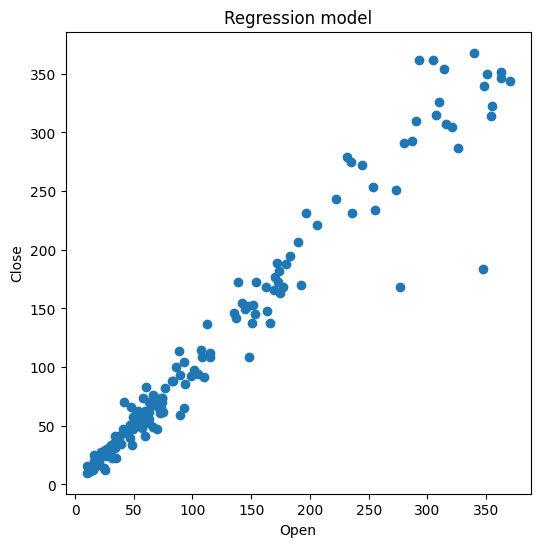

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(6,6))
plt.scatter(data_set['Open'],data_set['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Regression model')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I want to check the data distribution of independent variable(Open)and dependent variable(Close)

##### 2. What is/are the insight(s) found from the chart?

Answer Here
it seems,there are some outliers there.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here
Yes,this insight can help us when building a model.

#### Chart - 9

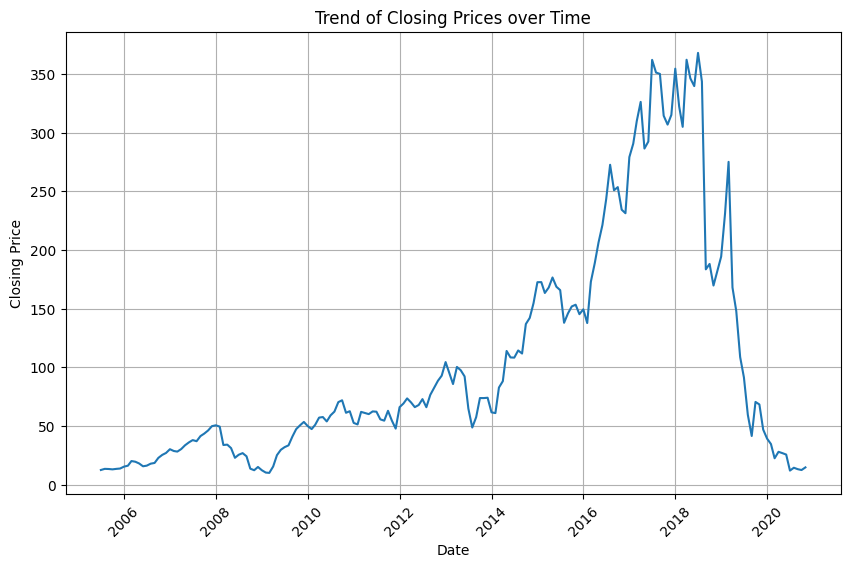

In [ ]:
# Chart - 9 visualization code
dates = data_set.index
closing_prices = data_set['Close']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend of Closing Prices over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

i just wanted to check the dataset trend on a yearly basis.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

it seems that there are sudden decline in the dataset graph after 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes,it can help.

#### Chart - 10

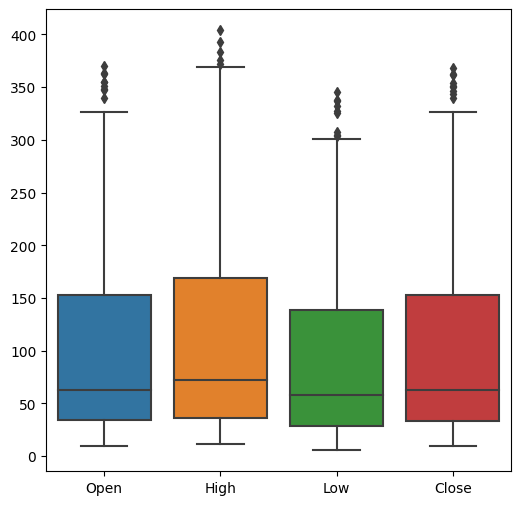

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(6,6))
sns.boxplot(data_set)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I wanted to check if there are outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There are some outliers in the dataset and we need to deal with them before building the model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes,because outliers can lead to overfiting the model.

#### Chart - 11

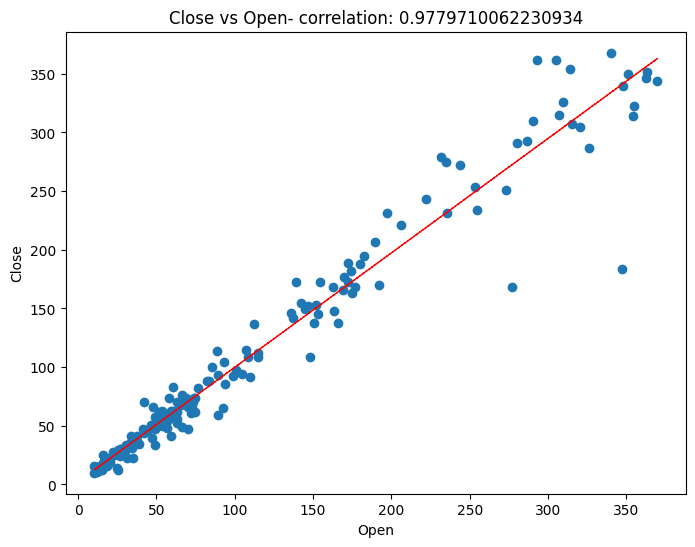

In [ ]:
# Chart - 11 visualization code
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
feature = data_set['Open']
label = data_set['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Open' + '- correlation: ' + str(correlation))
z = np.polyfit(data_set['Open'], data_set['Close'], 1)
y_hat = np.poly1d(z)(data_set['Open'])


plt.plot(data_set['Open'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I want to check correlation between independent variable(Low)and dependent variable(Close)

##### 2. What is/are the insight(s) found from the chart?

Answer Here

it seems that independent variable (Low)is highly correlated with dependent variable(Close)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

if independent variable is highly correlated with dependent variable . it can lead to overfitting.

#### Chart - 12

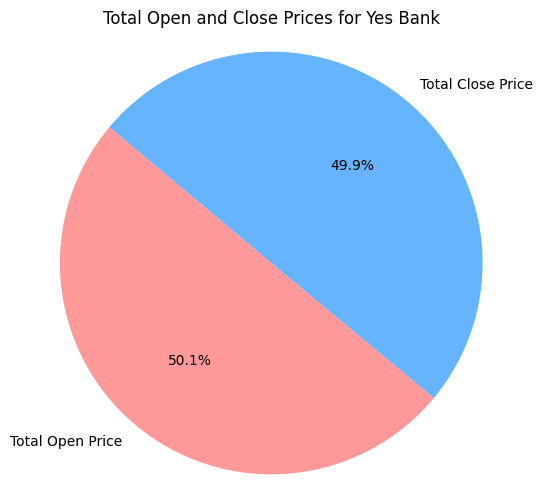

In [ ]:
# Chart - 12 visualization code
df_ = pd.DataFrame(data_set)

total_open_ = df_['Open'].sum()
total_close_ = df_['Close'].sum()

prices_ = [total_open_, total_close_]
labels = ['Total Open Price', 'Total Close Price']
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(6, 6))
plt.pie(prices_, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Open and Close Prices for Yes Bank')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
i wanted to check relationship between opening and closing price.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Data distribution s same in both columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

it can help in building the model.

#### Chart - 13

<Axes: xlabel='Close', ylabel='Density'>

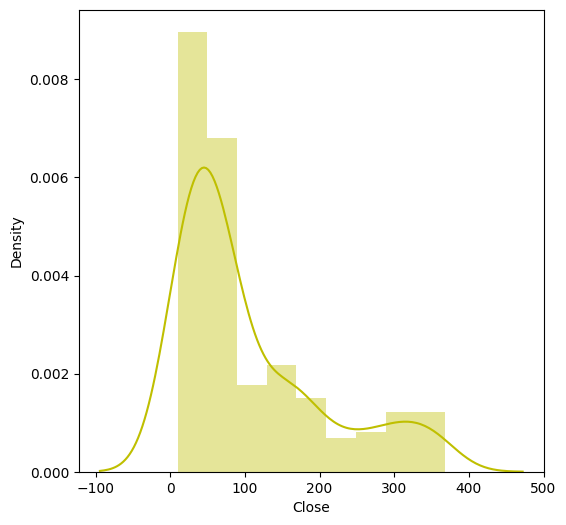

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(6,6))
sns.distplot(data_set['Close'], color='y')

##### 1. Why did you pick the specific chart?

Answer Here.

 I want to check distribution of the data



##### 2. What is/are the insight(s) found from the chart?

Answer Here

The data is right(positively) skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, because skewness can lead to a model overfitting, wrong assumption and poor evaluation metric scores.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = data_set.corr()



<Axes: >

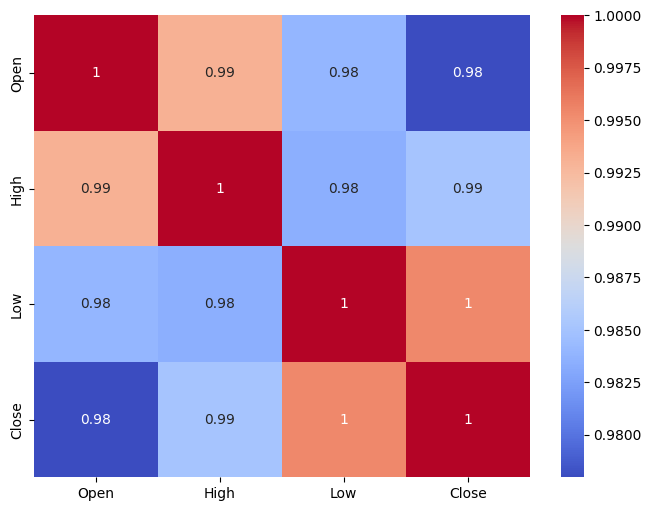

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

to understand the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

All independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector.

#### Chart - 15 - Pair Plot

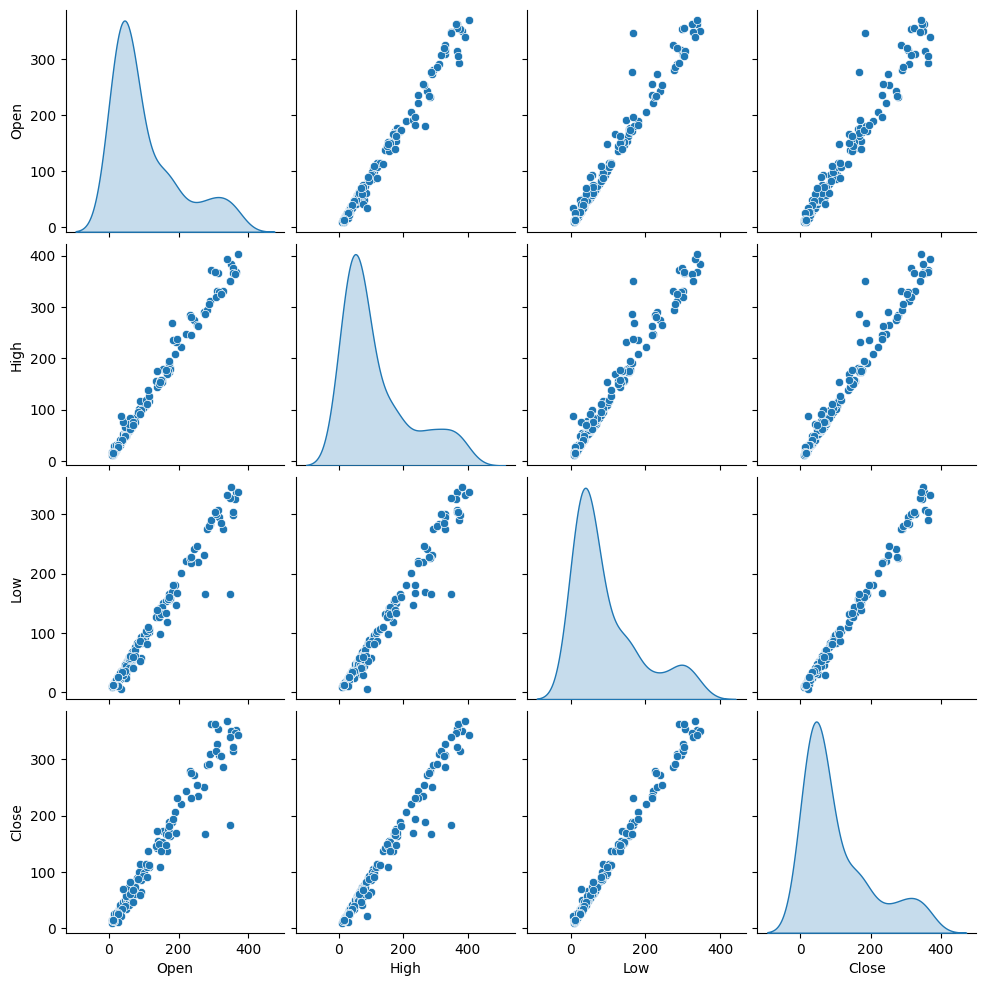

In [ ]:
# Pair Plot visualization code
sns.pairplot(data_set, diag_kind = 'kde')

##### 1. Why did you pick the specific chart?

Answer Here.

Pairplot allows us to plot pairwise relationship bewtween variable within a dataset and we can see the relationship of the dataset in single picture


##### 2. What is/are the insight(s) found from the chart?

Answer Here

Some variables are highly correlated with each other. We need to select our features wisely because their high correlation can lead to overfitting in a model

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.There is difference in the mean closing prices between the first half (2005-2017) and the second half (2018-2020) of the dataset.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

Null Hypothesis(H0):There is no significant difference in the mean closing prices between the first half and the second half of the dataset.

Alternate Hypothesis(H1):There is a significant difference in the mean closing prices between the first half and the second half of the dataset.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
df = data_set.copy()

# Divide the dataset into two halves: first half and second half
first_half = df['Close'][df.index.year <= 2017]
second_half = df['Close'][df.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-score
z = (mean1 - mean2) / standard_error

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")



Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value?

Answer Here.


Ihave used Z test

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Calculate the mean opening and closing prices for each month
df['Month'] = df.index.strftime('%Y-%m')
monthly_data = df.groupby('Month').agg({'Open': 'mean', 'Close': 'mean'})

# Define the threshold for high and low opening prices
threshold = monthly_data['Open'].median()

# Divide the data into groups based on opening prices
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculate the sample statistics
mean_high = np.mean(high_opening_prices)
mean_low = np.mean(low_opening_prices)
std_high = np.std(high_opening_prices)
std_low = np.std(low_opening_prices)
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")

Reject the null hypothesis. There is a significant difference in the mean closing prices.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
data_set.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here. I have used isnull().sum() to identify null values in the data because this technique shows us if there are any null values present in your dataset or not

### 2. Handling Outliers

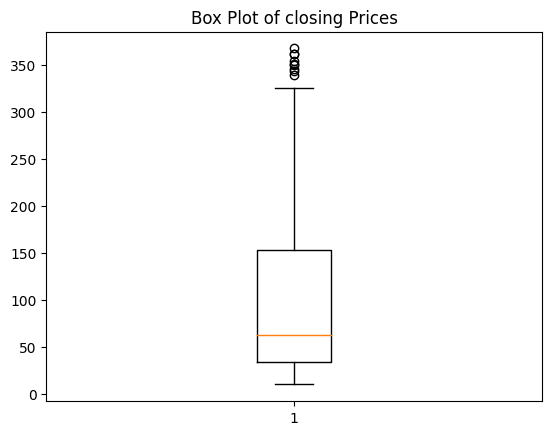

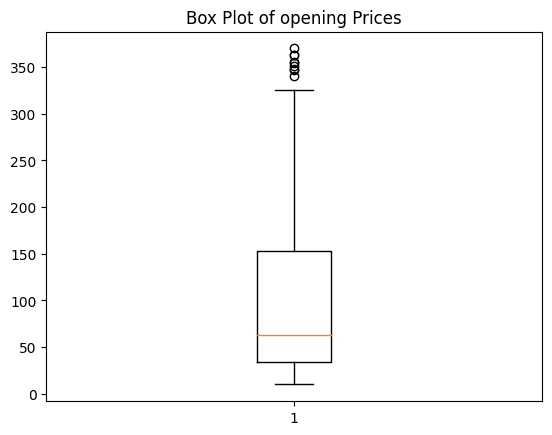

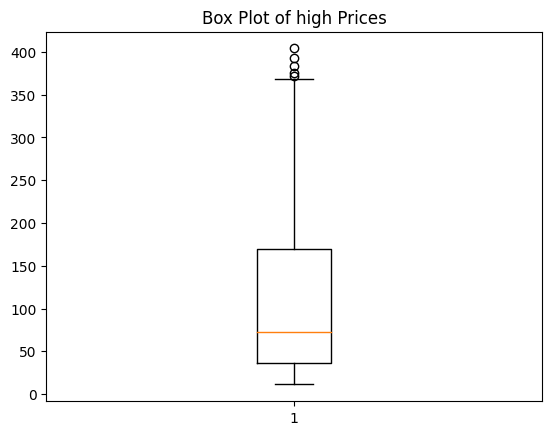

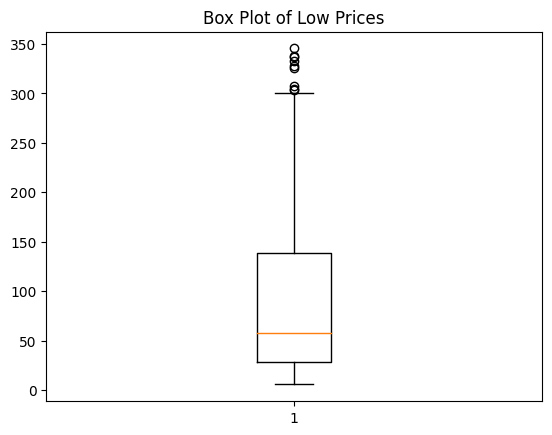

Close    33.45
Open     33.80
High     36.14
Low      28.51
Name: 0.25, dtype: float64 Close    153.30
Open     153.00
High     169.19
Low      138.35
Name: 0.75, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7b26c5034790>,
 'caps': [<matplotlib.lines.Line2D at 0x7b26c5034cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b26c50344f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b26c5035210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b26c50354b0>],
 'means': []}

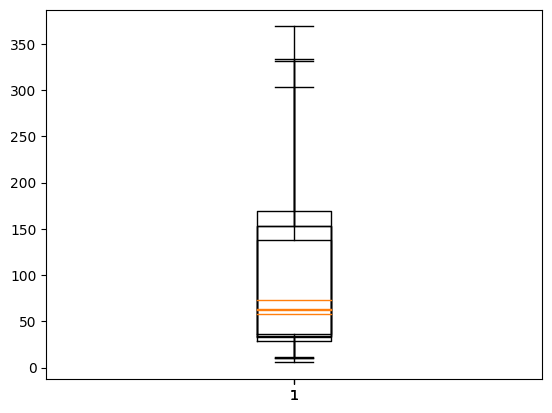

In [ ]:
# Handling Outliers & Outlier treatments
plt.boxplot(data_set['Close'])
plt.title('Box Plot of closing Prices')
plt.show()

plt.boxplot(data_set['Open'])
plt.title('Box Plot of opening Prices')
plt.show()

plt.boxplot(data_set['High'])
plt.title('Box Plot of high Prices')
plt.show()

plt.boxplot(data_set['Low'])
plt.title('Box Plot of Low Prices')
plt.show()

column_to_check = ['Close','Open','High','Low']

percentile25 = data_set[column_to_check].quantile(0.25)
percentile75 = data_set[column_to_check].quantile(0.75)

print(percentile25,percentile75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data_set[column_to_check] = np.where(
    data_set[column_to_check] > upper_limit,
    upper_limit,
    np.where(
        data_set[column_to_check] < lower_limit,
        lower_limit,
        data_set[column_to_check]

    )
)

plt.boxplot(data_set['Open'])

plt.boxplot(data_set['High'])

plt.boxplot(data_set['Low'])

plt.boxplot(data_set['Close'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

 I have used iqr method to deal with outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

There areno categorical columns present in the data.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.There are no categorical columns in the data.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

    calc_vif(data_set[[i for i in dataset.describe().columns]])

    data_set['new_val'] = data_set[['Open','High','Low']].mean(axis=1).round(2)

    data_set.head()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
dependent_variable = 'Close'

independent_variable = list(set(data_set.columns.tolist()) - {dependent_variable})

##### What all feature selection methods have you used  and why?

Answer Here.

 Here i have used variance inflation factor.

##### Which all features you found important and why?

Answer Here.

I believe that 'open','high',and 'close' must be included because the opening price is high,and when it's low,there is a significant change in the closing price

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,because the independent variables and dependent variables have skeweness. I have used a log transformation here.

In [ ]:
# Transform Your data
X = np.log10(data_set[independent_variable]).values
y = np.log10(data_set[dependent_variable]).values

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?
i have used MinMaxScaler method.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.


No, beacuse we have only 5 features that's why dimensionality reduction is not necessary here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

We have only 5 features, so there's no need to use any dimensionality reduction technique here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

##### What data splitting ratio have you used and why?

Answer Here.

I have used 80 percent of the data for training the model and 20% for testing the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

The data is not imbalanced

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
lr = LinearRegression()

# Fit the Algorithm
lr.fit(X_train,y_train)

# Predict on the model
lr.score(X_train, y_train)*100

lr.coef_
lr.intercept_
X_train_pred = lr.predict(X_train)
X_test_pred = lr.predict(X_test)
y_pred = lr.predict(X_test)

lr.score(X_test,y_test)*100




99.28234409815916

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#training dataset metrics

print(mean_absolute_error(10**(y_train),(10**X_train_pred)))



print(mean_squared_error(10**(y_train), 10**(X_train_pred)))


print(np.sqrt(mean_squared_error(10**(y_train), 10**(X_train_pred))))


print((r2_score(10**(y_train), 10**(X_train_pred)))*100)


print((1-(1-r2_score(10**(y_train), 10**(X_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))*100)


# Test dataset metrics

print(mean_absolute_error(10**(y_test),(10**X_test_pred)))


print(mean_squared_error(10**(y_test), 10**(X_test_pred)))


print(np.sqrt(mean_squared_error(10**(y_test), 10**(X_test_pred))))


print((r2_score(10**(y_test), 10**(X_test_pred)))*100)


print((1-(1-r2_score(10**(y_test), 10**(X_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)







4.157935044830208
60.39010541926964
7.771107090966488
99.2925046652321
99.27552477719767
4.625792068295456
51.64034019691902
7.186121359740525
99.51385801716997
99.48581136431439


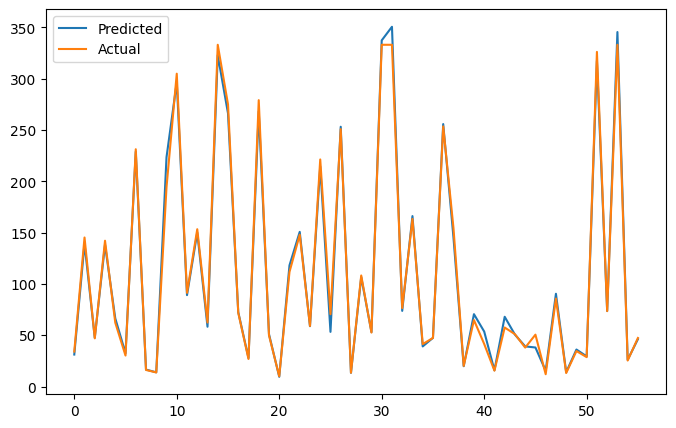

In [ ]:
#Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=10)
ridge_regressor.fit(X_train,y_train)

# Fit the Algorithm
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " r2 score is: ", ridge_regressor.best_score_)


# Predict on the model
ridge_regressor.score(X_train,y_train)




The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  r2 score is:  0.9942062061958385


0.9958280369913951

In [ ]:
X_train_ridge = ridge_regressor.predict(X_train)
y_test_ridge = ridge_regressor.predict(X_test)


In [ ]:
# Training dataset metrics

print(mean_absolute_error(10**(y_train),(10**X_train_pred)))



print(mean_squared_error(10**(y_train), 10**(X_train_pred)))


print(np.sqrt(mean_squared_error(10**(y_train), 10**(X_train_pred))))


print((r2_score(10**(y_train), 10**(X_train_pred)))*100)


print((1-(1-r2_score(10**(y_train), 10**(X_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))*100)


4.157935044830208
60.39010541926964
7.771107090966488
99.2925046652321
99.27552477719767


In [ ]:

# Test dataset metrics

print(mean_absolute_error(10**(y_test),(10**X_test_pred)))


print(mean_squared_error(10**(y_test), 10**(X_test_pred)))


print(np.sqrt(mean_squared_error(10**(y_test), 10**(X_test_pred))))


print((r2_score(10**(y_test), 10**(X_test_pred)))*100)


print((1-(1-r2_score(10**(y_test), 10**(X_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

4.625792068295456
51.64034019691902
7.186121359740525
99.51385801716997
99.48581136431439


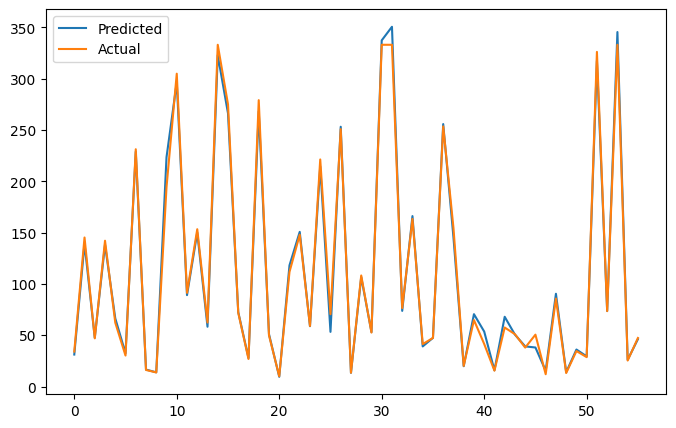

In [ ]:
#Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
XG_boost = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
XG_boost.fit(X_train,y_train)

# Predict on the model
y_pred_train_XG_boost = XG_boost.predict(X_train)
y_pred_test_XG_boost = XG_boost.predict(X_test)


In [ ]:
# Training dataset metrics

print(mean_absolute_error(10**(y_train),(10**y_pred_train_XG_boost)))



print(mean_squared_error(10**(y_train),(10**y_pred_train_XG_boost)))


print(np.sqrt(mean_squared_error(10**(y_train),(10**y_pred_train_XG_boost))))


print( (r2_score(10**(y_train), 10**(y_pred_train_XG_boost)))*100)


print((1-(1-r2_score(10**(y_train), 10**(y_pred_train_XG_boost)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))*100)

0.2706340080083816
0.28802764447909696
0.5366820702046017
99.99662563571734
99.99654465097456


In [ ]:
# Test dataset metrics

print(mean_absolute_error(10**(y_test),(10**y_pred_test_XG_boost)))


print( mean_squared_error(10**(y_test), 10**(y_pred_test_XG_boost)))


print( np.sqrt( mean_squared_error(10**(y_test), 10**(y_pred_test_XG_boost))))


print((r2_score(10**(y_test), 10**(y_pred_test_XG_boost)))*100)


print( (1-(1-r2_score(10**(y_test), 10**(y_pred_test_XG_boost)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)

6.733239677292963
125.66875569383994
11.210207656142678
98.8169547714089
98.74870216206712


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [233]:
# Visualizing evaluation Metric Score chart
train_MAE_XG = mean_absolute_error(10**(y_train),(10**y_pred_train_XG_boost))
print(f"Mean Absolute Error : {train_MAE_XG}")


train_MSE_XG  = mean_squared_error(10**(y_train),(10**y_pred_train_XG_boost))
print("MSE :" , train_MSE_XG)

train_RMSE_XG = np.sqrt(train_MSE_XG)
print("RMSE :" ,train_RMSE_XG)

train_r2_XG = r2_score(10**(y_train), 10**(y_pred_train_XG_boost))
print("R2 :" ,train_r2_XG*100)

train_adjusted_r2_XG = 1-(1-r2_score(10**(y_train), 10**(y_pred_train_XG_boost)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_XG*100)
MAE_test_XG = mean_absolute_error(10**(y_test),(10**y_pred_test_XG_boost))
print(f"Mean Absolute Error : {MAE_test_XG}")

MSE_test_XG  = mean_squared_error(10**(y_test), 10**(y_pred_test_XG_boost))
print("MSE :" , MSE_test_XG)

RMSE_test_XG = np.sqrt(MSE_test_XG)
print("RMSE :" ,RMSE_test_XG)

r2_test_XG = r2_score(10**(y_test), 10**(y_pred_test_XG_boost))
print("R2 :" ,r2_test_XG*100)

adjusted_r2_test_XG = 1-(1-r2_score(10**(y_test), 10**(y_pred_test_XG_boost)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_test_XG*100)

EM = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_XG = [train_MAE_XG, train_MSE_XG, train_RMSE_XG, train_r2_XG*100, train_adjusted_r2_XG*100]
test_XG = [MAE_test_XG,MSE_test_XG,RMSE_test_XG,r2_test_XG*100,adjusted_r2_test_XG*100]

#final dataframe of parameters
data_xg = pd.DataFrame({'Evalution Parameters': EM, 'Train':train_XG, 'Test':test_XG}).set_index('Evalution Parameters')
data_xg

Mean Absolute Error : 0.2706340080083816
MSE : 0.28802764447909696
RMSE : 0.5366820702046017
R2 : 99.99662563571734
Adjusted R2: 99.99654465097456
Mean Absolute Error : 6.733239677292963
MSE : 125.66875569383994
RMSE : 11.210207656142678
R2 : 98.8169547714089
Adjusted R2: 98.74870216206712


,Train,Test
Evalution Parameters,,
MAE,0.270634,6.733240
MSE,0.288028,125.668756
RMSE,0.536682,11.210208
r2,99.996626,98.816955
adjusted_r2,99.996545,98.748702


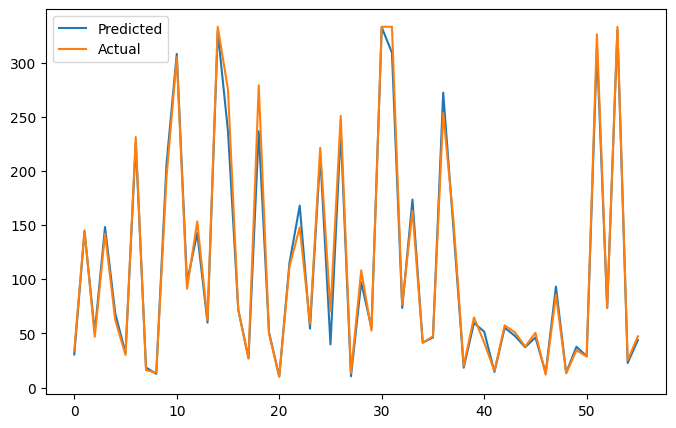

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_test_XG_boost))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_xg = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [2,4,6,8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]


}
XGB = GridSearchCV(estimator= XG_boost, param_grid=param_grid_xg, cv=10, scoring='r2')

# Fit the Algorithm
XGB.fit(X_train, y_train)

# Predict on the model
best_model_xgb_gs = XGB.best_estimator_
y_pred_train_XGB_cross = XGB.predict(X_train)
y_pred_test_XGB_cross = XGB.predict(X_test)

In [ ]:
best_model_xgb_gs.feature_importances_

In [ ]:
XGB.score(X_train,y_train)

In [ ]:
# Training dataset metrics
train_MAE_XG_cross = mean_absolute_error(10**(y_train),(10**y_pred_train_XGB_cross))
print(f"Mean Absolute Error : {train_MAE_XG_cross}")


train_MSE_XG_cross  = mean_squared_error(10**(y_train),(10**y_pred_train_XGB_cross))
print("MSE :" , train_MSE_XG_cross)

train_RMSE_XG_cross = np.sqrt(train_MSE_XG_cross)
print("RMSE :" ,train_RMSE_XG_cross)

train_r2_XG_cross = r2_score(10**(y_train), 10**(y_pred_train_XGB_cross))
print("R2 :" ,train_r2_XG_cross*100)

train_adjusted_r2_XG_cross = 1-(1-r2_score(10**(y_train), 10**(y_pred_train_XGB_cross)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_XG_cross*100)



In [ ]:
# Test dataset metrics
MAE_test_XG_cross = mean_absolute_error(10**(y_test),(10**y_pred_test_XGB_cross))
print(f"Mean Absolute Error : {MAE_test_XG_cross}")

MSE_test_XG_cross  = mean_squared_error(10**(y_test), 10**(y_pred_test_XGB_cross))
print("MSE :" , MSE_test_XG_cross)

RMSE_test_XG_cross = np.sqrt(MSE_test_XG_cross)
print("RMSE :" ,RMSE_test_XG_cross)

r2_test_XG_cross = r2_score(10**(y_test), 10**(y_pred_test_XGB_cross))
print("R2 :" ,r2_test_XG_cross*100)

adjusted_r2_test_XG_cross = 1-(1-r2_score(10**(y_test), 10**(y_pred_test_XGB_cross)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_test_XG_cross*100)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_test_XGB_cross))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
EM = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_XG_boost_cross = [train_MAE_XG_cross, train_MSE_XG_cross, train_RMSE_XG_cross, train_r2_XG_cross*100, train_adjusted_r2_XG_cross*100]
test_XG_boost_cross = [MAE_test_XG_cross,MSE_test_XG_cross,RMSE_test_XG_cross,r2_test_XG_cross*100,adjusted_r2_test_XG_cross*100]

#final dataframe of parameters
data_xg_cross = pd.DataFrame({'Evalution Parameters': EM, 'Train':train_XG_boost_cross, 'Test':test_XG_boost_cross}).set_index('Evalution Parameters')
data_xg_cross

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
Random_fr = RandomForestRegressor()

In [ ]:
Random_fr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_random = Random_fr.predict(X_train)
y_pred_test_random = Random_fr.predict(X_test)

In [ ]:
# Training dataset metrics
train_MAE_random = mean_absolute_error(10**(y_train),(10**y_pred_train_random))
print(f"Mean Absolute Error : {train_MAE_random}")


train_MSE_random  = mean_squared_error(10**(y_train),(10**y_pred_train_random))
print("MSE :" , train_MSE_random)

train_RMSE_random = np.sqrt(train_MSE_random)
print("RMSE :" ,train_RMSE_random)

train_r2_random = r2_score(10**(y_train), 10**(y_pred_train_random))
print("R2 :" ,train_r2_random*100)

train_adjusted_r2_random = 1-(1-r2_score(10**(y_train), 10**(y_pred_train_random)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_random*100)

Mean Absolute Error : 2.112781617294065
MSE : 11.172651811864366
RMSE : 3.3425516917266016
R2 : 99.86910771261283
Adjusted R2: 99.86596629771554


In [ ]:
# Test dataset metrics
MAE_Test_random = mean_absolute_error(10**(y_test),(10**y_pred_test_random))
print(f"Mean Absolute Error : {MAE_Test_random}")

MSE_test_random  = mean_squared_error(10**(y_test), 10**(y_pred_test_random))
print("MSE :" , MSE_test_random)

RMSE_test_random = np.sqrt(MSE_test_random)
print("RMSE :" ,RMSE_test_random)

r2_test_random = r2_score(10**(y_test), 10**(y_pred_test_random))
print("R2 :" ,r2_test_random*100)

adjusted_r2_test_random = 1-(1-r2_score(10**(y_test), 10**(y_pred_test_random)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_test_random*100)

Mean Absolute Error : 6.217610474394549
MSE : 90.08363378009271
RMSE : 9.491239844198054
R2 : 99.15195298521675
Adjusted R2: 99.10302719590234


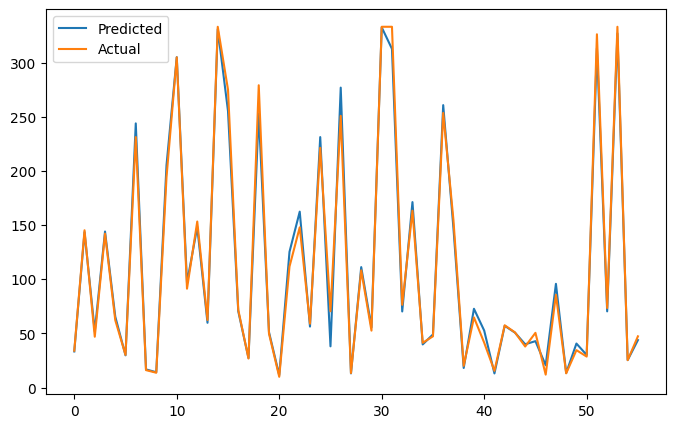

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_test_random))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
Scores = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_random = [train_MAE_random, train_MSE_random, train_RMSE_random, train_r2_random*100, train_adjusted_r2_random*100]
test_random = [MAE_Test_random, MSE_test_random,RMSE_test_random,r2_test_random*100,adjusted_r2_test_random*100]

#final dataframe of parameters
data_random = pd.DataFrame({'Evalution Parameters': Scores, 'Train':train_random, 'Test':test_random}).set_index('Evalution Parameters')
data_random

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV
param_grid_Random_fr = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}
random_search = RandomizedSearchCV(Random_fr, param_grid_Random_fr, verbose=2, cv=5, scoring='r2')

# Fit the Algorithm
random_search.fit(X_train, y_train)

# Predict on the model
best_model_rf_rs = random_search.best_estimator_

In [ ]:
best_model_rf_rs.feature_importances_

In [ ]:
y_pred_train_random_cross= random_search.predict(X_train)
y_pred_test_random_cross = random_search.predict(X_test)

In [ ]:
random_search.score(X_train,y_train)

In [ ]:
# Training dataset metrics
train_MAE_random_cross = mean_absolute_error(10**(y_train),(10**y_pred_train_random_cross))
print(f"Mean Absolute Error : {train_MAE_random_cross}")


train_MSE_random_cross  = mean_squared_error(10**(y_train),(10**y_pred_train_random_cross))
print("MSE :" , train_MSE_random_cross)

train_RMSE_random_cross = np.sqrt(train_MSE_random_cross)
print("RMSE :" ,train_RMSE_random_cross)

train_r2_random_cross = r2_score(10**(y_train), 10**(y_pred_train_random_cross))
print("R2 :" ,train_r2_random_cross*100)

train_adjusted_r2_random_cross = 1-(1-r2_score(10**(y_train), 10**(y_pred_train_random_cross)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_random_cross*100)

In [ ]:
# Test dataset metrics
MAE_test_random_cross = mean_absolute_error(10**(y_test),(10**y_pred_test_random_cross))
print(f"Mean Absolute Error : {MAE_test_random_cross}")

MSE_test_random_cross  = mean_squared_error(10**(y_test), 10**(y_pred_test_random_cross))
print("MSE :" , MSE_test_random_cross)

RMSE_test_random_cross = np.sqrt(MSE_test_random_cross)
print("RMSE :" ,RMSE_test_random_cross)

r2_test_random_cross = r2_score(10**(y_test), 10**(y_pred_test_random_cross))
print("R2 :" ,r2_test_random_cross*100)

adjusted_r2_test_random_cross = 1-(1-r2_score(10**(y_test), 10**(y_pred_test_random_cross)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_test_random_cross*100)

In [ ]:
Scores = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_random_cross = [train_MAE_random_cross, train_MSE_random_cross, train_RMSE_random_cross, train_r2_random_cross*100, train_adjusted_r2_random_cross*100]
test_random_cross = [MAE_test_random_cross,MSE_test_random_cross,RMSE_test_random_cross,r2_test_random_cross*100,adjusted_r2_test_random_cross*100]

#final dataframe of parameters
data_random_cross = pd.DataFrame({'Evalution Parameters': Scores, 'Train':train_random_cross, 'Test':test_random_cross}).set_index('Evalution Parameters')
data_random_cross

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.
MAE (Mean Absolute Error):

MAE serves as a metric for assessing the effectiveness of regression models. It calculates the average absolute difference between the predicted values and the actual (observed) values within a given dataset.

RMSE (Root Mean Square Error):

RMSE computes the square root of the average of the squared variances between predicted values and actual (observed) values. It provides a measure of the magnitude of errors in predictions.

R2 (Coefficient of Determination):

The R2 score assesses how well a model aligns with the data. Ranging from 0 to 1, a higher value indicates a superior fit, implying that the model can elucidate a significant portion of the variability in the data. This is valuable for enhancing decision-making.

Adjusted R2:

Adjusted R-squared considers the number of predictors (independent variables) in the model. It penalizes models with an excess of predictors, aiding in the prevention of overfitting. This becomes especially crucial when dealing with multiple features, striking a balance between model complexity and explanatory capability.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.
I intend to opt for XGBoost as my ultimate model choice due to its commendable performance in both training and testing phases, as evidenced by high scores in R-squared (R²) and adjusted R-squared (adjusted R²) metrics. Furthermore, XGBoost demonstrates minimal errors in Mean Absolute Error (MAE) and Root Mean Square Error (RMSE), providing advantageous outcomes for business predictions.








### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

I am utilizing the RandomForestRegressor model for the purpose of model interpretability.

In [ ]:
importances = Random_fr.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In the backdrop of the 2018 fraud case concerning Yes Bank, our objective was to formulate a predictive model for the month's closing price. Employing the RandomForestRegressor, XGBoost, a linear model, and Ridge, I undertook a comprehensive analysis. The outcomes revealed that XGBoost emerged as the most effective model, demonstrating robust performance on both training and testing datasets, characterized by minimal Mean Absolute Error (MAE) and Root Mean Square Error (RMSE). This underscores the suitability of XGBoost for accurately forecasting Yes Bank's closing prices in the aftermath of the 2018 fraud case.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***